### Gender Prediction

In this project, we will make a model to classify names based on gender.

Name Features:
    - Female names typically end in a vowel while male names typically end in a consonant.
    - Expanding upon this idea in this project using Naive Bayes

Bayes' Theorem: describes the probability of an event based on some condition that may be related to that event.
    - The probability of A given B = the probability of B given A * the probability of A / the probablity of B
Naive: Naive assumption is all the features are independent


In [2]:
import nltk
import random
from nltk.corpus import names

In [4]:
print(names.fileids())

['female.txt', 'male.txt']


In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [6]:
names_cfd = nltk.ConditionalFreqDist((fileid, name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

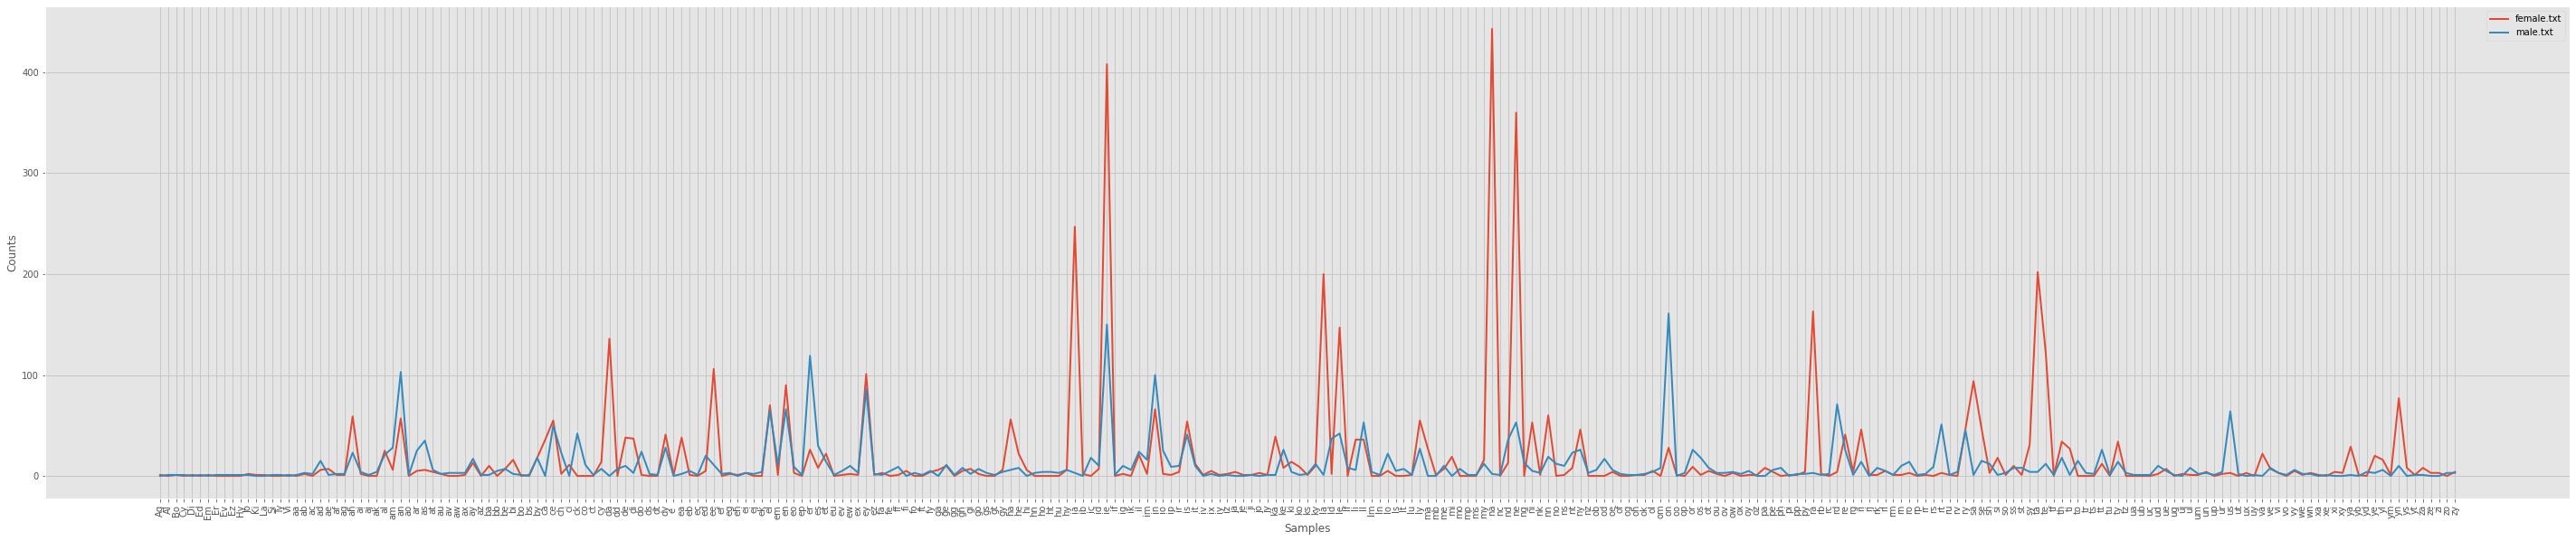

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
plt.figure(figsize=(50,10))
names_cfd.plot()

In [8]:
def name_features(name):
    return {"pair": name[-2:]}

In [9]:
print(name_features("Katy"))

{'pair': 'ty'}


In [13]:
name_list = [(name, "male") for name in names.words("male.txt")] + [(name, "female") for name in names.words("female.txt")]
print("Name List: ", name_list[-10:])

Name List:  [('Zonnya', 'female'), ('Zora', 'female'), ('Zorah', 'female'), ('Zorana', 'female'), ('Zorina', 'female'), ('Zorine', 'female'), ('Zsa Zsa', 'female'), ('Zsazsa', 'female'), ('Zulema', 'female'), ('Zuzana', 'female')]


In [15]:
random.shuffle(name_list)
print("Name List: ", name_list[-10:])

Name List:  [('Elbertina', 'female'), ('Onida', 'female'), ('Ivor', 'male'), ('Germain', 'female'), ('Izak', 'male'), ('Marie-Jeanne', 'female'), ('Aryn', 'female'), ('Susette', 'female'), ('Samantha', 'female'), ('Corwin', 'male')]


In [16]:
features = [(name_features(name),gender) for (name,gender) in name_list]
print(features[-10:])

[({'pair': 'na'}, 'female'), ({'pair': 'da'}, 'female'), ({'pair': 'or'}, 'male'), ({'pair': 'in'}, 'female'), ({'pair': 'ak'}, 'male'), ({'pair': 'ne'}, 'female'), ({'pair': 'yn'}, 'female'), ({'pair': 'te'}, 'female'), ({'pair': 'ha'}, 'female'), ({'pair': 'in'}, 'male')]


In [17]:
halfLen = len(features)//2
training_set = features[:halfLen]
testing_set = features[halfLen:]

print(len(training_set), len(testing_set))

3972 3972


In [18]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [19]:
male_names = names.words("male.txt")
print("Carmello" in male_names)

False


In [21]:
print(classifier.classify(name_features("Carmello")))

male


In [23]:
accuracy = nltk.classify.accuracy(classifier, testing_set)
print("Classifier Accuracy: ", accuracy)

Classifier Accuracy:  0.7814702920443102


In [33]:
print(classifier.classify(name_features("Blake")))

male
